In [1]:
!jt -t grade3 -tf sourcesans -tfs 14 -fs 13 -dfs 14 -N -T

#!jt -r

### Introduction to Visualising Data Using Matplotlib

##### CSAA2022

### Visualising Your Data 

* "A picture is worth a thousand words"


* Visualisations help us communicate results; draw conclusions; decide on policies



* Sometimes easier to summarise a large dataset using a plot



* Here, we focus on scientific visualisations

### Some examples


<img src="imgs/distributions.png" width=200 /> <img src="imgs/UMAP.png" width=200 />
 
<img src="imgs/heatmap.png" width=200 />     <img src="imgs/stacked_histogram.png" width=200 /> 







### Why matplotlib?

* Makes it easy to generated publication quality plots


* Includes detailed documentation with examples 


* Integrates well with numpy and other scientific Python packages 


* Allows for extensions and customisation


* There are other plotting packages available but matplotlib is often considered the standard

### Anatomy of a figure

<img src="imgs/anatomy.png" width=400 />

### Independent and dependent variables

* Often in experiments, the relationship between two variables can be described as *y = f(x)* where x is the independent variable and y is the dependent variable. When plotting the data, we aim to visually describe the function, *f*



* Generally, the independent variable should be on the x axis and the dependent variable goes on the y axis. For example, a scientist is investigating the effect of immune cell activator dose on the expression of different genes. In that case the dose will be plotted on the x-axis as this is the variable controlled by the scientist and the gene expression will be plotted on y as this is what is measured.


* However, in some situations it's not as easy to tell the independent and dependent variables apart. As such, it does not matter how you plot those variables. This is unsual however and in most of the examples we are going to see you will be required to plot your data keeping in mind independent and dependent variables.

### 2D Plots



### Scatter plot

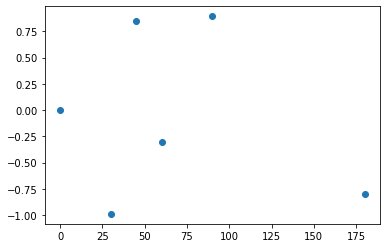

In [2]:
import numpy as np #you are already familiar with that

# these import matplotlib, and make it draw figures directly in the notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

x = np.array([0,30,45,60,90,180])
y = np.sin(x)
plt.scatter(x,y)
plt.show()


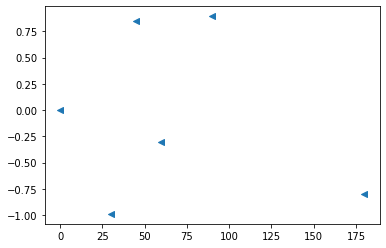

In [2]:
#have a look at the documentation of matplotlib for full list of marker options

#in some cases you may want to plot different groups of data, using different markers
plt.scatter(x,y,marker='<')

### Bar chart

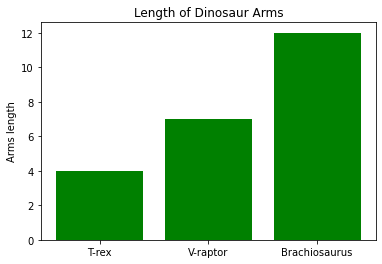

In [15]:
dino = ['T-rex','V-raptor','Brachiosaurus']
x_pos = np.arange(len(dino))
arms = [4,7,12]
 
plt.bar(x_pos,arms,color='green')

plt.xticks(x_pos, dino)
plt.ylabel("Arms length")
plt.title("Length of Dinosaur Arms")
plt.show()


### Example

Sometimes a single dataset can be represented in multiple ways. Our example is going to use quarterly measurements of the gas used in the UK, data recorded between 1960 and 1986. This can be considered as an example of a simple relationship, x - year and y - gas consumption.

The original units are megatherms. 1 megatherm is about 30,000,000 kWh.



In [16]:
gas = np.loadtxt("data/gas.csv",delimiter=',') #this line should be familiar from our numpy slides
np.set_printoptions(suppress=True)
print(gas[:10, :])
# gas

[[   1.   1960.    160.1 ]
 [   2.   1960.25  129.7 ]
 [   3.   1960.5    84.8 ]
 [   4.   1960.75  120.1 ]
 [   5.   1961.    160.1 ]
 [   6.   1961.25  124.9 ]
 [   7.   1961.5    84.8 ]
 [   8.   1961.75  116.9 ]
 [   9.   1962.    169.7 ]
 [  10.   1962.25  140.9 ]]


In [5]:
gas.shape

(108, 3)

In [6]:
gas[:,2]

array([ 160.1,  129.7,   84.8,  120.1,  160.1,  124.9,   84.8,  116.9,
        169.7,  140.9,   89.7,  123.3,  187.3,  144.1,   92.9,  120.1,
        176.1,  147.3,   89.7,  123.3,  185.7,  155.3,   99.3,  131.3,
        200.1,  161.7,  102.5,  136.1,  204.9,  176.1,  112.1,  140.9,
        227.3,  195.3,  115.3,  142.5,  244.9,  214.5,  118.5,  153.7,
        244.9,  216.1,  188.9,  142.5,  301. ,  196.9,  136.1,  267.3,
        317. ,  230.5,  152.1,  336.2,  371.4,  240.1,  158.5,  355.4,
        449.9,  286.6,  179.3,  403.4,  491.5,  321.8,  177.7,  409.8,
        593.9,  329.8,  176.1,  483.5,  584.3,  395.4,  187.3,  485.1,
        669.2,  421. ,  216.1,  509.1,  827.7,  467.5,  209.7,  542.7,
        840.5,  414.6,  217.7,  670.8,  848.5,  437. ,  209.7,  701.2,
        925.3,  443.4,  214.5,  683.6,  917.3,  515.5,  224.1,  694.8,
        989.4,  477.1,  233.7,  730. , 1087. ,  534.7,  281.8,  787.6,
       1163.9,  613.1,  347.4,  782.8])

#### Starting off with a simple visualisation

Text(0.5, 1.0, 'UK Gas quarterly gas usage 1960-1986')

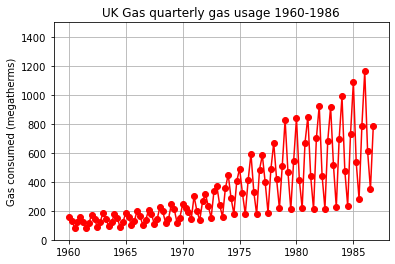

In [18]:
fig = plt.figure() # create a new figure

ax = fig.add_subplot(1, 1, 1) #create a new subplot, returning a set of axes
# note: the call is formatted fig.add_subplot(rows, columns, index)
ax.plot(gas[:, 1], gas[:, 2], "-or")
ax.set_ylabel("Gas consumed (megatherms)")
ax.grid("on")
ax.set_ylim(0, 1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")

#### Layered plot split by season

In [25]:
q1 = gas[::4, :]
q2 = gas[1::4, :]
q3 = gas[2::4, :]
q4 = gas[3::4, :]
q1.shape

(27, 3)

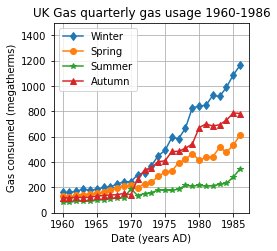

In [22]:
fig = plt.figure(figsize=(3.5,3.5))
ax = fig.add_subplot(1,1,1)
ax.plot(q1[:,1], q1[:,2], label='Winter', marker='d')
ax.plot(q1[:,1], q2[:,2], label='Spring', marker='o')
ax.plot(q1[:,1], q3[:,2], label='Summer', marker='*')
ax.plot(q1[:,1], q4[:,2], label='Autumn', marker='^')
ax.set_xlabel('Date (years AD)')
ax.set_ylabel('Gas consumed (megatherms)')
ax.grid("on")
ax.set_ylim(0,1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")
ax.legend()

#### Faceted plot

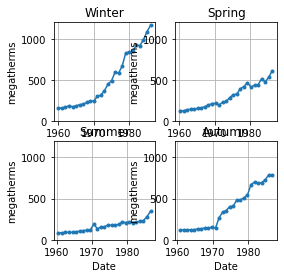

In [23]:
fig = plt.figure(figsize=(4, 4))
for ix, quarter, season in zip(
    [1, 2, 3, 4], [q1, q2, q3, q4], ["Winter", "Spring", "Summer", "Autumn"]
):
    ax = fig.add_subplot(2, 2, ix)
    ax.plot(quarter[:, 1], quarter[:, 2], marker=".")
    ax.set_xlabel("Date")
    ax.set_ylabel("megatherms")
    ax.grid("on")
    ax.set_title(season)
    ax.set_ylim(0, 1200)
# fig.tight_layout()  # fix overlapping plots!

#### Adding in some stats

Text(0.5, 1.0, 'UK Gas quarterly gas usage 1960-1986')

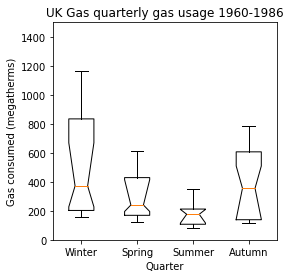

In [11]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(
    [q1[:, 2], q2[:, 2], q3[:, 2], q4[:, 2]],labels=["Winter", "Spring", "Summer", "Autumn"],
    notch=True, bootstrap=1000,
)
ax.set_xlabel("Quarter")
ax.set_ylabel("Gas consumed (megatherms)")
ax.set_ylim(0, 1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")


### Box plots
* Box plots rely on multiple computed statistics of the data
* Useful for comparing distributions: e.g. between patient groups, healthy vs disease
* **Whiskers**: represent the 2.5% and 98.5% percentiles (i.e. span 95% of the range).
* The **interquartile range** (the range between the 75% and 25% percentiles of the dataset) shown as box

<img src="imgs/boxplot.png" width=400 />

### Violin plots

* Violin plots are an extension of box plots. 

* The distribution of the data can be seen more precisely. 

* Plotting of the full distribution with a smoothing technique. 

<img src="imgs/violin_box.png" width=400 />

### Speaking of distributions

#### Histograms

* Might look like bar charts BUT no space between the bars we are **binning** continuous data
* Shows count of values within a range
* Useful for visualising the distribution of the data
* Important to ensure we are not selecting too many or to few bins


<img src="imgs/stacked_histogram.png" width=400 />


### Some other statistics to compute

(4, 27, 3)

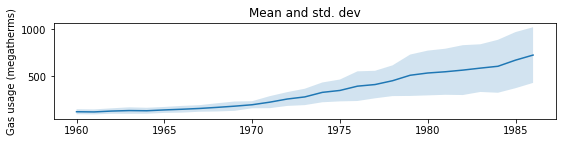

In [30]:
#could also do the same with mix and max or confidence intervals
quarters = np.stack([q1,q2,q3,q4])
mean_gas = np.mean(quarters[:,:,2], axis=0)
std_gas = np.std(quarters[:,:,2], axis=0)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(3,1,1)
ax.set_title("Mean and std. dev")
ax.set_ylabel("Gas usage (megatherms)")
ax.plot(quarters[0,:,1], mean_gas)
ax.fill_between(quarters[0,:,1], mean_gas+std_gas, mean_gas-std_gas, alpha=0.2)
quarters.shape

### Dealing with uncertainty

* Data are often collected from measurements with observation error, so the values obtained are corrupted versions of the true values. 

* Uncertainty of model parameters 

* As scientists we are meant to communicate those appropriately and be honest about them! 

* In the earlier examples, we've looked at standard deviation or interquartile range and how they can be used to show summaries of a collection of data.

### Dealing with uncertainty: Error bars

There are several choices for the error bars:
    
* the standard deviation
* the standard error
* confidence intervals (e.g. 95%)
* nonparametric intervals such as interquartile ranges.

Make sure you communicate the choice of error bar to the reader: e.g include it in the capture of the figure or the legend. 

<img src="imgs/error_bars.png" width=300 />



### Some thoughts

* Think about the purpose of your plot

* Often there are multiple suitable ways of representing your data (e.g think about our gas use in the UK over the years example)

* Be careful of variables you place on x and y

* Don't forget to include titles, labels, legends, caption, etc

* Think about uncertainty and how you communicate it across in your visualisations